In [105]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
# ignore warnings
import warnings

warnings.filterwarnings('ignore')

In [106]:
column_names = [
"address",
"price",
"gross_tax",
"strata_maintenance_fees",
"bedrooms",
"bathrooms",
"property_type",
"property_age",
"title",
"style",
"heating_type",
"feature",
"amenities",
"appliances",
"community",
"days_on_rew",
"property_views",
"mls®_number",
"source",
'frontage', 
'lot_size', 
'year_built', 
'depth',
'half_bathrooms'
]



# Get average housing price per city

In [107]:

def get_df(file_path, apply_columns=True):

    sys.path.append(file_path)

    data = pd.read_csv(file_path, on_bad_lines='skip')

    # data.dropna(inplace=True)
    if apply_columns:
        data.columns = column_names
    return data



folder = "../data/raw_2023_04_19/"

filenames = {
    "burnaby": "burnaby_real_estate_data.csv",
    "langley":"langley_real_estate_data.csv",
    "richmond":"richmond_real_estate_data.csv",
    "maple_ridge":"maple-ridge_real_estate_data.csv",
    "surrey":"surrey_real_estate_data.csv",
    "new_west": "new-westminster_real_estate_data.csv",
    "vancouver":"vancouver_real_estate_data.csv",
    "coquitlam":"coquitlam_real_estate_data.csv",
    "north_vancouver":"north-vancouver_real_estate_data.csv",
    "west_vancouver":"west-vancouver_real_estate_data.csv",
    "delta":"delta_real_estate_data.csv",
    "pitt_meadows":"pitt-meadows_real_estate_data.csv",
    "kelowna":"kelowna_real_estate_data.csv",
    "port_coquitlam":"port-coquitlam_real_estate_data.csv"
}

dataframes = {}

for k,v in filenames.items():
    dataframes[k] = get_df(folder + v)

dataframes.keys()



dict_keys(['burnaby', 'langley', 'richmond', 'maple_ridge', 'surrey', 'new_west', 'vancouver', 'coquitlam', 'north_vancouver', 'west_vancouver', 'delta', 'pitt_meadows', 'kelowna', 'port_coquitlam'])

In [108]:
# get neighbourhoods per city

neighbourhoods_city = {}

for city, df in dataframes.items():
    
    neighbourhoods = df['community'].unique()
    for neighbourhood in neighbourhoods:

        neighbourhoods_city[neighbourhood] = city

neighbourhoods_city

{'burnaby lake': 'burnaby',
 'metrotown': 'burnaby',
 'highgate': 'burnaby',
 'sullivan heights': 'burnaby',
 'central park': 'burnaby',
 'simon fraser hills': 'burnaby',
 'government road': 'burnaby',
 'capitol hill': 'burnaby',
 'brentwood park': 'burnaby',
 'parkcrest': 'burnaby',
 'east burnaby': 'burnaby',
 'forest glen': 'burnaby',
 'simon fraser university': 'burnaby',
 'central burnaby north': 'burnaby',
 'south slope': 'burnaby',
 'montecito': 'burnaby',
 'upper deer lake': 'burnaby',
 'the crest': 'burnaby',
 'big bend': 'burnaby',
 'burnaby hospital': 'burnaby',
 'sperling-duthie': 'burnaby',
 'edmonds': 'burnaby',
 'cariboo': 'burnaby',
 'vancouver heights': 'burnaby',
 'westridge': 'burnaby',
 'oaklands': 'burnaby',
 'suncrest': 'burnaby',
 'willingdon heights': 'burnaby',
 'deer lake': 'burnaby',
 'forest hills': 'burnaby',
 'oakdale': 'burnaby',
 'buckingham heights': 'burnaby',
 'deer lake place': 'burnaby',
 'greentree village': 'burnaby',
 'salmon river': 'langley',
 

In [109]:
# find out which city the row is in
clean_combined_data = get_df(file_path=folder + "clean_combined_data.csv", apply_columns=False)

clean_combined_data['city'] = clean_combined_data['community'].apply(lambda x: neighbourhoods_city.get(x, 'unknown'))

City,Average Price
west_vancouver,"5,536,074"
vancouver,"3,650,319"
richmond,"3,012,453"
langley,"2,883,940"
north_vancouver,"2,724,911"
pitt_meadows,"2,590,511"
burnaby,"2,552,369"
surrey,"2,477,063"
coquitlam,"2,273,790"
delta,"2,094,613"


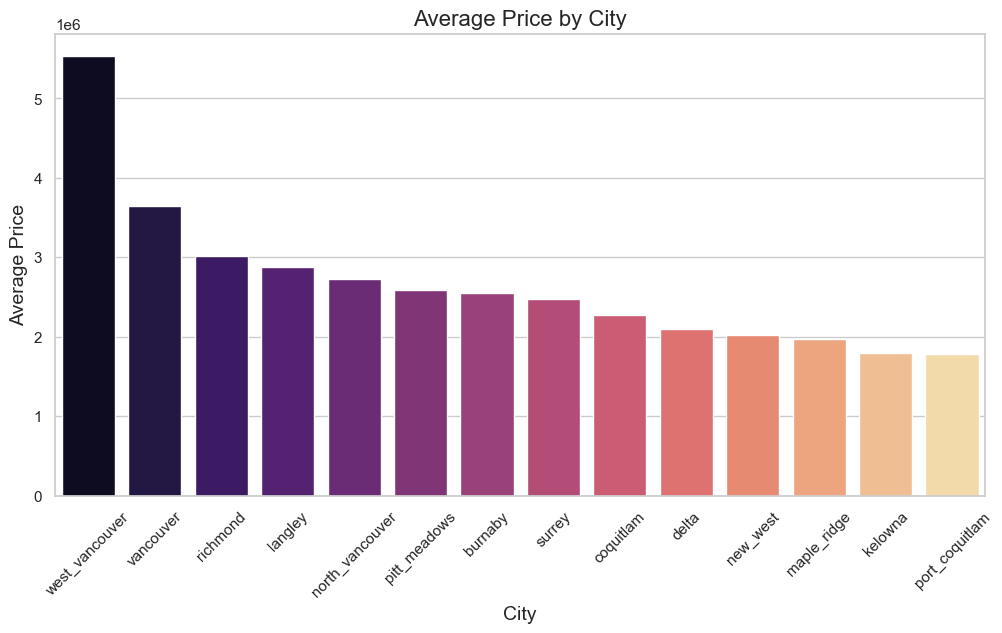

In [117]:



# Group the data by the 'city' column and calculate the mean of the 'price' column
average_price_by_city = clean_combined_data.groupby('city')['price'].mean()

# Sort the average prices in descending order
average_price_by_city_sorted = average_price_by_city.sort_values(ascending=False)

# Create a DataFrame from the sorted average prices
average_price_by_city_df = pd.DataFrame(average_price_by_city_sorted).reset_index()

# Rename the columns for better readability
average_price_by_city_df.columns = ['City', 'Average Price']

# Display the sorted average prices as a table
display(average_price_by_city_df.style.hide_index().format({"Average Price": "{:,.0f}"}))

# Set the Seaborn style
sns.set(style="whitegrid")

# Plot the sorted average price for each city using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='City', y='Average Price', data=average_price_by_city_df, palette="magma")

# Set the title and labels for the plot
ax.set_title('Average Price by City', fontsize=16)
ax.set_xlabel('City', fontsize=14)
ax.set_ylabel('Average Price', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()
